# Code is from [this blog post](https://victorzhou.com/blog/keras-cnn-tutorial/).

In [1]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras import callbacks as cb

Using TensorFlow backend.


In [2]:
train_images = mnist.train_images() 
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

In [3]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [4]:
# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [5]:
class testCallback(cb.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('epoch finished!')

In [19]:
# Train the model.
result = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=30,
  validation_data=(test_images, to_categorical(test_labels)),
  callbacks=[testCallback()]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.1061 - accuracy: 0.9691 - val_loss: 0.0947 - val_accuracy: 0.9718
epoch finished!
Epoch 2/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0914 - accuracy: 0.9734 - val_loss: 0.0915 - val_accuracy: 0.9711
epoch finished!
Epoch 3/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0826 - accuracy: 0.9758 - val_loss: 0.0872 - val_accuracy: 0.9720
epoch finished!
Epoch 4/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0751 - accuracy: 0.9780 - val_loss: 0.0839 - val_accuracy: 0.9748
epoch finished!
Epoch 5/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0700 - accuracy: 0.9791 - val_loss: 0.0776 - val_accuracy: 0.9757
epoch finished!
Epoch 6/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.0772 - val

In [20]:
print(result.history)

{'val_loss': [0.0947217606883496, 0.09149814995583147, 0.08715842303819954, 0.08392891092952341, 0.0775657221463509, 0.07719777573365719, 0.07708442440684884, 0.07796155415605753, 0.08058144022920169, 0.07692267868209164, 0.08046409758408554, 0.08231347252111881, 0.07390434851297177, 0.07763619159015361, 0.07820840786350891, 0.07621240934666712, 0.08693573121725348, 0.08542948164036497, 0.08139614301423717, 0.078492746322311, 0.08128331521584187, 0.08503858275066596, 0.0851800661216781, 0.08353851456964694, 0.08385036167031648, 0.09135985571148922, 0.08992228647177836, 0.09189532083197555, 0.09307946734330907, 0.09508587809799282], 'val_accuracy': [0.9718000292778015, 0.9710999727249146, 0.972000002861023, 0.9747999906539917, 0.9757000207901001, 0.9764999747276306, 0.977400004863739, 0.9754999876022339, 0.9749000072479248, 0.9749000072479248, 0.9745000004768372, 0.9747999906539917, 0.9782999753952026, 0.9750000238418579, 0.9772999882698059, 0.977400004863739, 0.9745000004768372, 0.9763

In [21]:
import matplotlib
import matplotlib.pyplot as plt

3.1.1


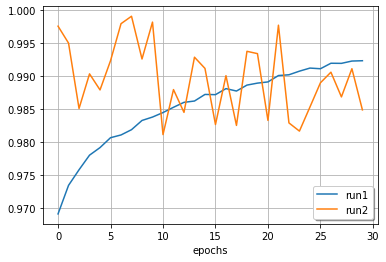

In [33]:
print(matplotlib.__version__)

random_vals = (50 - np.random.rand(30)) / 50

fig, ax = plt.subplots()
ax.plot(range(30), result.history['accuracy'], label="run1")
ax.plot(range(30), random_vals, label="run2")
legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')
ax.set(xlabel='epochs')
ax.grid()

fig.savefig("test.png")